# Import Required Libraries
Import the necessary libraries, including gensim and nltk.

In [28]:
# Import Required Libraries
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.corpus import brown

# Download the Brown corpus if not already downloaded
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

# Load and Preprocess the Corpus
Load a real-world text corpus and preprocess it by removing stop words, punctuation, and performing other text cleaning steps.

In [29]:
# Load and Preprocess the Corpus

import string
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the Brown corpus
corpus = brown.sents()

# Preprocess the corpus
stop_words = set(stopwords.words('english'))
processed_corpus = []

for sentence in corpus:
    # Convert to lower case
    sentence = [word.lower() for word in sentence]
    # Remove punctuation
    sentence = [word.translate(str.maketrans('', '', string.punctuation)) for word in sentence]
    # Remove stop words
    sentence = [word for word in sentence if word not in stop_words]
    # Remove empty strings
    sentence = [word for word in sentence if word]
    processed_corpus.append(sentence)

# Display the first 5 processed sentences
processed_corpus[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  'atlantas',
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['jury',
  'said',
  'termend',
  'presentments',
  'city',
  'executive',
  'committee',
  'overall',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['septemberoctober',
  'term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'hardfought',
  'primary',
  'mayornominate',
  'ivan',
  'allen',
  'jr'],
 ['relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'interest',
  'election',
  'number',
  'voters',
  'size',
  'city'],
 ['jury',
  'said',
  'find',
  'many',
  'georgias',
  'registration',
  'election',
  'laws',
  'outmoded',
 

# Tokenize the Text
Tokenize the cleaned text into sentences and words using nltk or another tokenizer.

In [30]:
import nltk
nltk.data.path.append('C:/Users/Huy/AppData/Roaming/nltk_data')
nltk.download('punkt')  # Download the 'punkt' resource
nltk.download('punkt_tab')  # Download the 'punkt_tab' resource
# Tokenize the Text
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize the cleaned text into sentences and words
tokenized_sentences = [word_tokenize(' '.join(sentence)) for sentence in processed_corpus]

# Display the first 5 tokenized sentences
tokenized_sentences[:5]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Huy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['fulton',
  'county',
  'grand',
  'jury',
  'said',
  'friday',
  'investigation',
  'atlantas',
  'recent',
  'primary',
  'election',
  'produced',
  'evidence',
  'irregularities',
  'took',
  'place'],
 ['jury',
  'said',
  'termend',
  'presentments',
  'city',
  'executive',
  'committee',
  'overall',
  'charge',
  'election',
  'deserves',
  'praise',
  'thanks',
  'city',
  'atlanta',
  'manner',
  'election',
  'conducted'],
 ['septemberoctober',
  'term',
  'jury',
  'charged',
  'fulton',
  'superior',
  'court',
  'judge',
  'durwood',
  'pye',
  'investigate',
  'reports',
  'possible',
  'irregularities',
  'hardfought',
  'primary',
  'mayornominate',
  'ivan',
  'allen',
  'jr'],
 ['relative',
  'handful',
  'reports',
  'received',
  'jury',
  'said',
  'considering',
  'widespread',
  'interest',
  'election',
  'number',
  'voters',
  'size',
  'city'],
 ['jury',
  'said',
  'find',
  'many',
  'georgias',
  'registration',
  'election',
  'laws',
  'outmoded',
 

# Train the Word2Vec Model
Use gensim's Word2Vec class to train the model on the tokenized text.

In [31]:
# Define the Word2Vec model with Skip-gram and window size of 2
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, workers=4, sg=1)

# Train the model
model.train(tokenized_sentences, total_examples=model.corpus_count, epochs=model.epochs)

# Save the model
model.save("word2vec_skipgram_window2.model")

# Display the vocabulary
vocab = list(model.wv.index_to_key)
vocab[:10]  # Display the first 10 words in the vocabulary

['one', 'would', 'said', 'new', 'could', 'time', 'two', 'may', 'first', 'like']

# Evaluate the Model
Evaluate the trained Word2Vec model by finding similar words and visualizing word embeddings.

Words similar to 'government':
jurisdiction: 0.8690700531005859
india: 0.8665422201156616
constitution: 0.8590870499610901
un: 0.8547347784042358
rights: 0.8533143997192383
federal: 0.847195029258728
governments: 0.8391662240028381
usom: 0.8391008973121643
reserve: 0.8373464941978455
lobbies: 0.8312990069389343


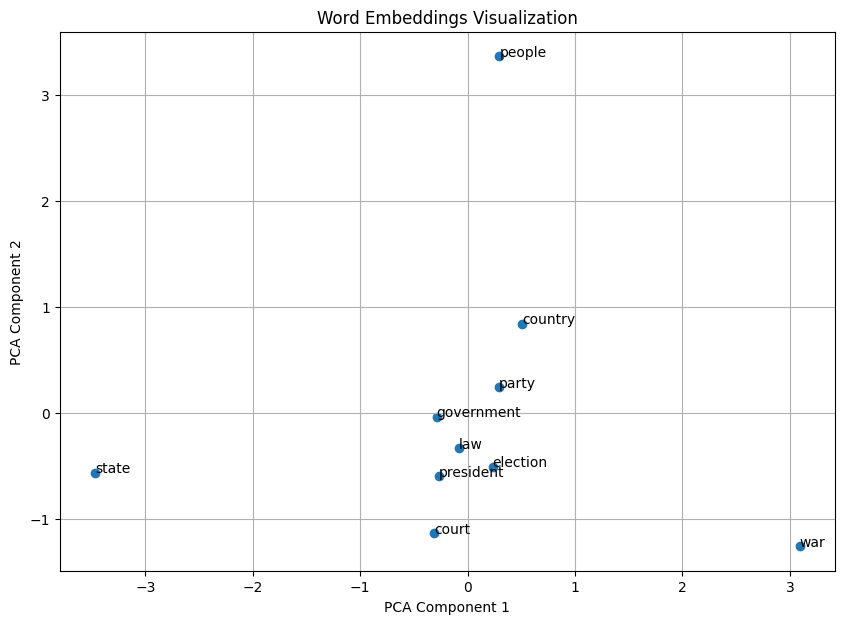

: 

In [ ]:
# Evaluate the Model

# Find similar words
similar_words = model.wv.most_similar('government', topn=10)
print("Words similar to 'government':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

# Visualize word embeddings using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select a subset of words for visualization
words = ['government', 'country', 'president', 'people', 'state', 'war', 'law', 'court', 'party', 'election']
word_vectors = [model.wv[word] for word in words]

# Reduce dimensions using PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the word embeddings
plt.figure(figsize=(10, 7))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Word Embeddings Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()